In [1]:
import sys
sys.path.insert(0, '../scripts')

from intervals import graph_pellet_interval, perform_T_test, MannWhitneyUTest, count_interval
import paths
from preprocessing import read_csv_clean
import numpy as np

### Fentanyl

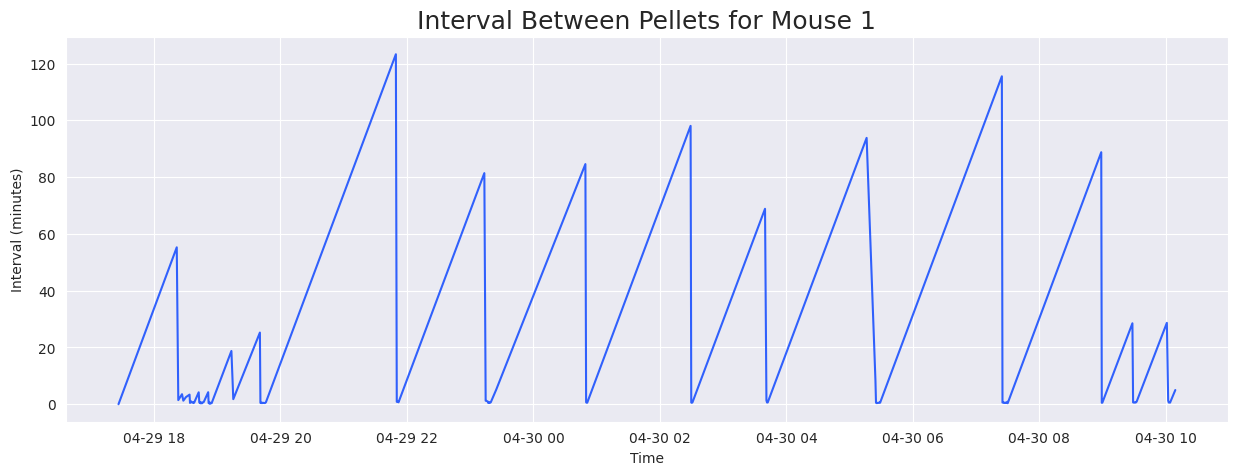

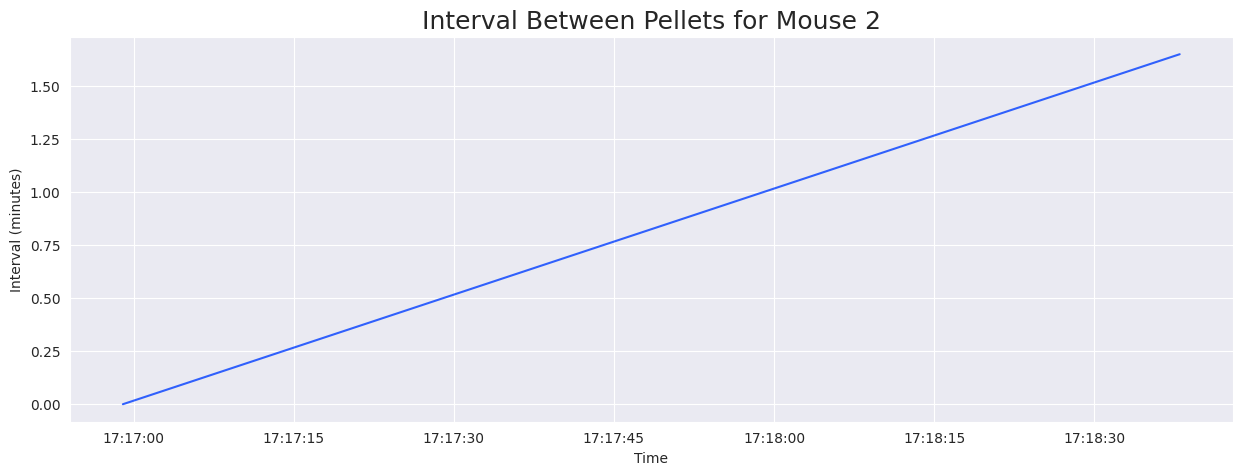

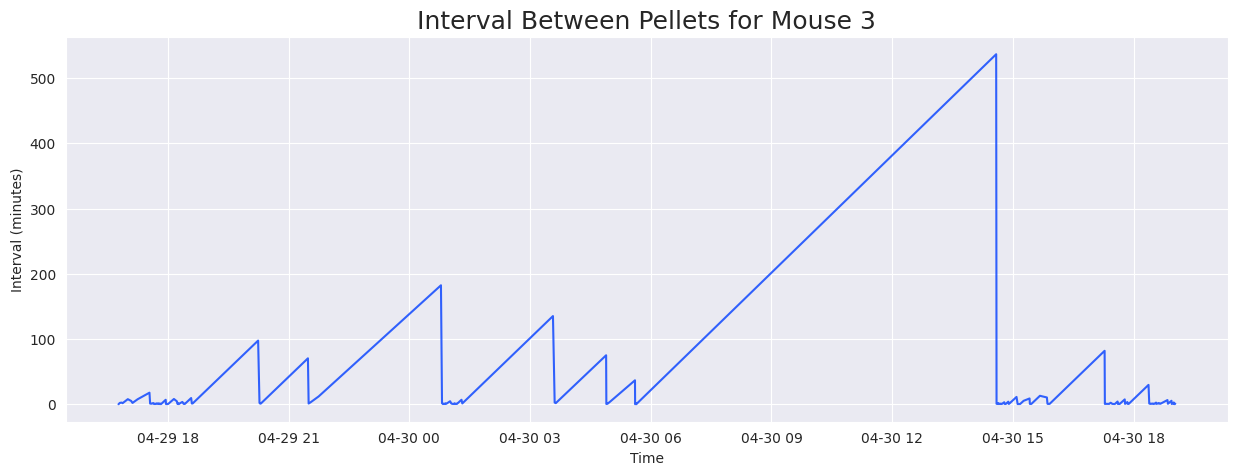

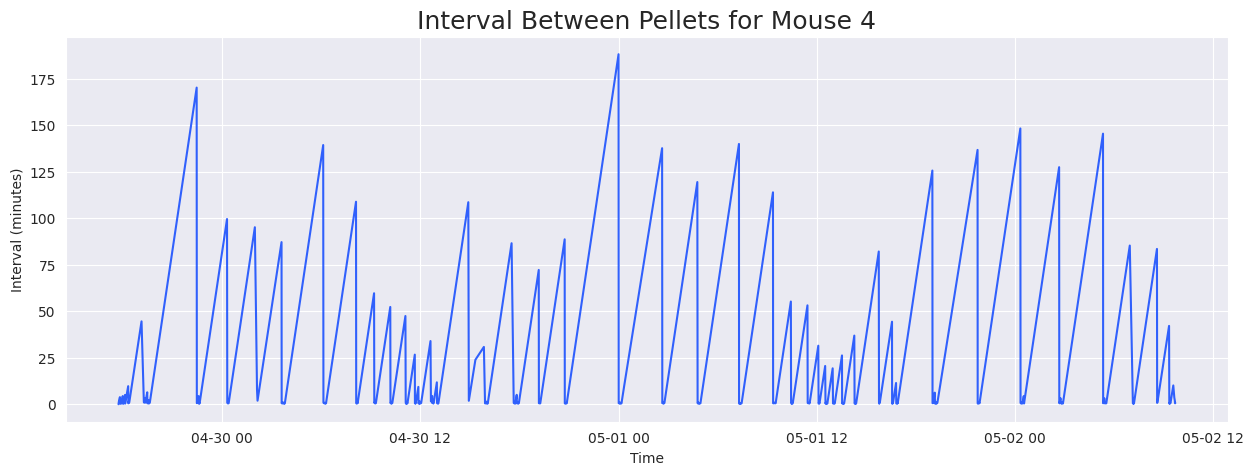

../scripts/intervals.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


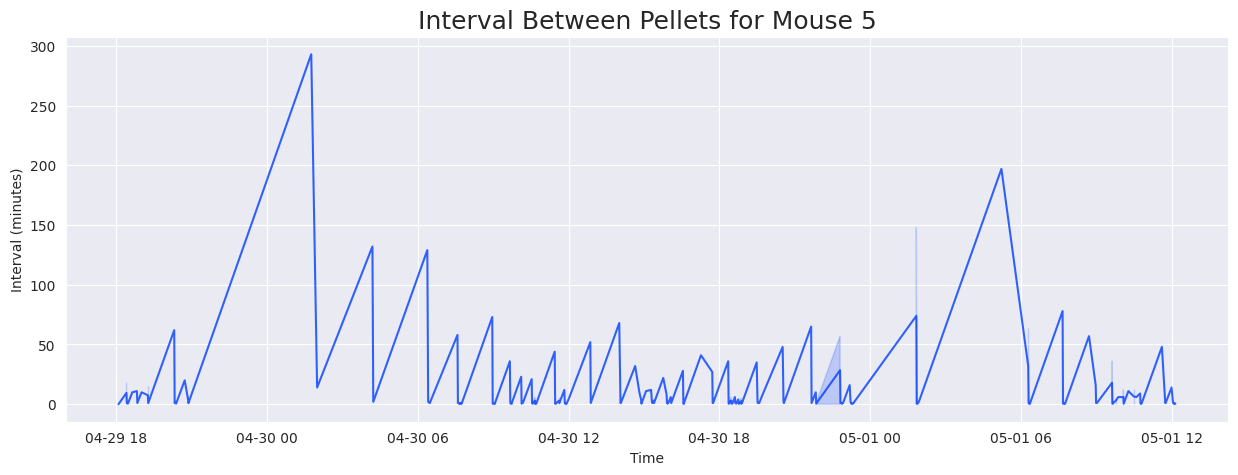

In [2]:
for file in paths.reversal_fent:
    graph_pellet_interval(file)

### Vehicle

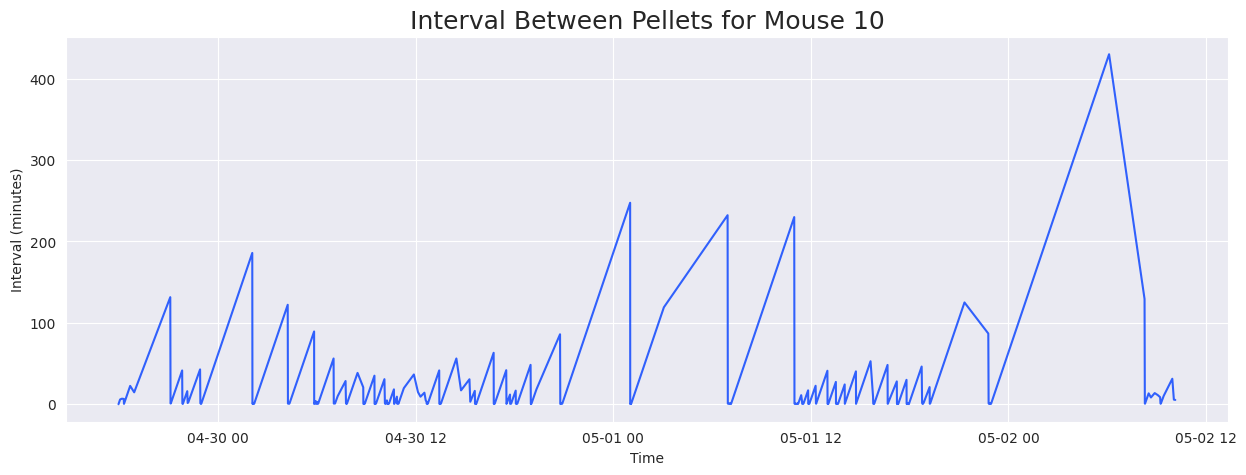

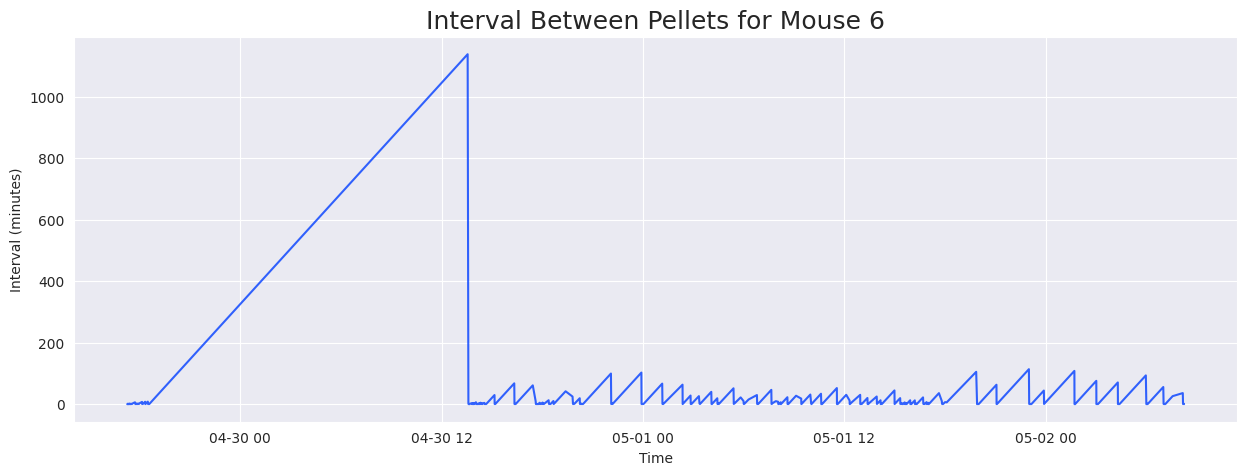

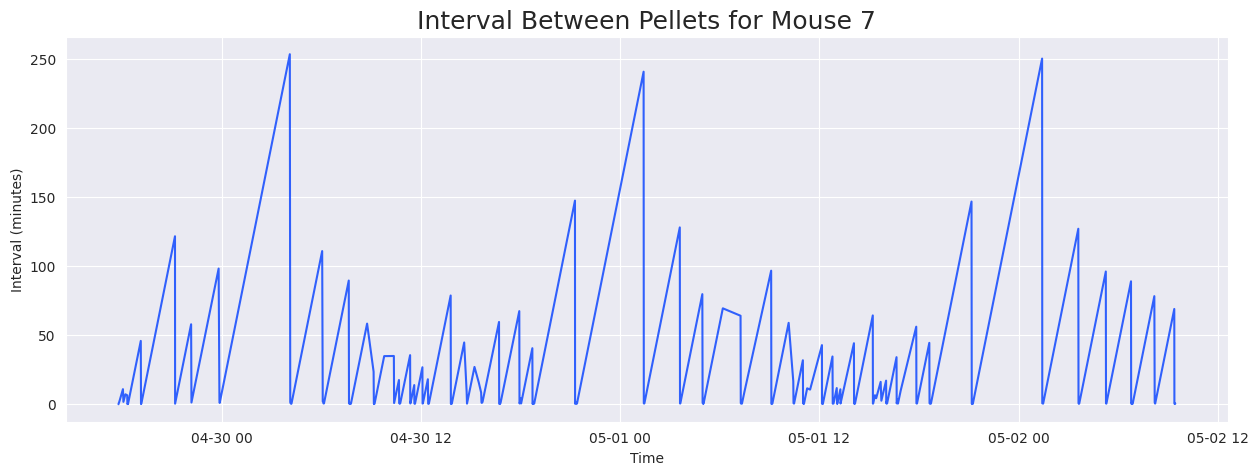

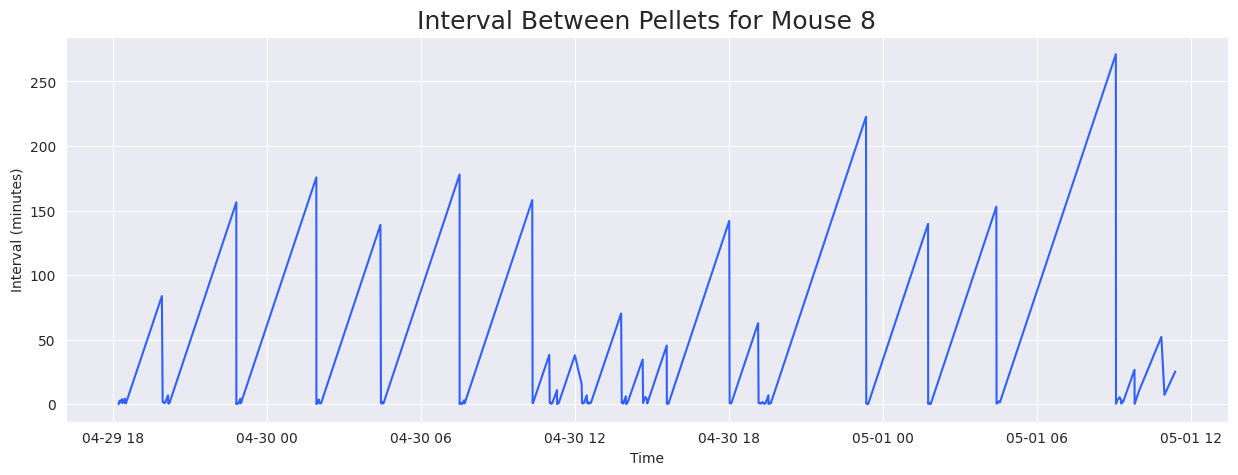

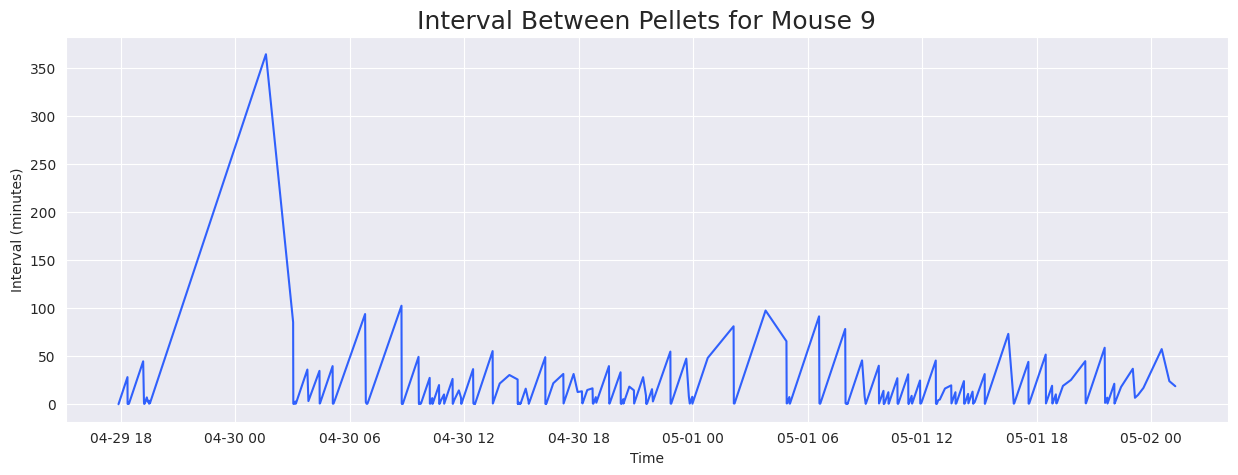

In [3]:
for file in paths.reversal_veh:
    graph_pellet_interval(file)

### Analysis

In [4]:
ctrl_fr1_interval = []
for path in paths.fr1_veh:
    data = read_csv_clean(path)
    interval = count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_fr1_interval.append(avg)

exp_fr1_interval = []
for path in paths.fr1_fent:
    data = read_csv_clean(path)
    interval = count_interval(data)
    avg = np.sum(interval) / len(interval)
    exp_fr1_interval.append(avg)

ctrl_flip_avg = []
for path in paths.reversal_veh:
    data = read_csv_clean(path)
    interval = count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_flip_avg.append(avg)

exp_flip_avg = []
for path in paths.reversal_fent:
    data = read_csv_clean(path)
    interval = count_interval(data)
    avg = np.sum(interval) / len(interval)
    exp_flip_avg.append(avg)

../scripts/preprocessing.py:63: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [9]:
perform_T_test(ctrl_fr1_interval, exp_fr1_interval, test_side='greater')

P Value is  0.1326067726213735
There is no significant difference between the two groups.


In [6]:
perform_T_test(ctrl_fr1_interval, ctrl_flip_avg, test_side='less')

P Value is  0.0012251841147792202
Experiment group is significantly less than control group


In [7]:
perform_T_test(ctrl_flip_avg, exp_flip_avg, test_side='less')

P Value is  0.010475386813935181
Experiment group is significantly less than control group


In [8]:
perform_T_test(exp_fr1_interval, exp_flip_avg, test_side='less')

P Value is  0.00019393517412638123
Experiment group is significantly less than control group
